# **_Linear Regression_**


## OLS (Ordinary Least Squares)


### Closed Form (Normal form)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Normal form:

theta = (X.T _ X)^-1 _ X.T \* y

where X is the feature matrix and y is the target vector


In [2]:
df = pd.read_csv("../Dataset/marks2.csv")
df.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [3]:
df.shape

(100, 2)

In [4]:
df.rename(columns={"time_study": "Hours", "Marks": "Scores"}, inplace=True)

In [5]:
df.head()

,Hours,Scores
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


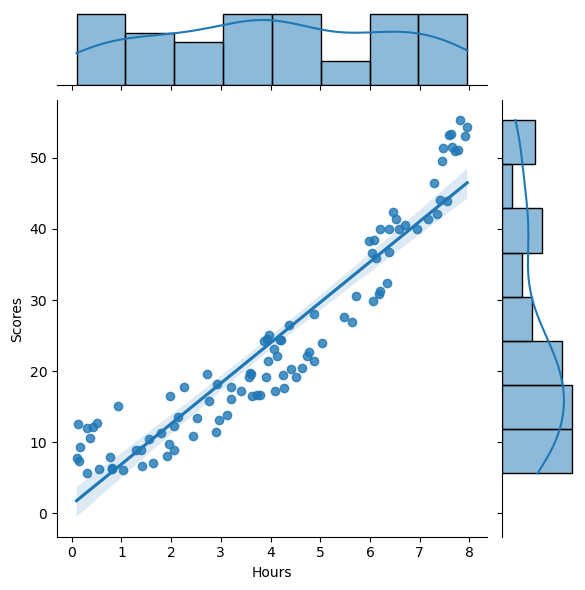

In [6]:
sns.jointplot(
    x=df["Hours"],
    y=df["Scores"],
    data=df,
    kind="reg",
)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["Hours"], df["Scores"], test_size=0.2, random_state=2
)

y_train.shape

(80,)

In [8]:
X_train = np.reshape(X_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [9]:
X_train[0]

array([7.543])

In [76]:
# creation of dataset for Normal Form
def cal_theta_mat(X: np.array, y: np.array):
    n_data = X.shape[0]
    # adding bias to  training dataset
    bias = np.ones((n_data, 1))
    X = np.append(bias, X, axis=1)
    # calculating theta using closed form of equation
    theta = np.linalg.inv(np.dot(X.T, X))
    theta = theta @ X.T
    theta = theta @ y

    return theta

In [77]:
def pred(m, X, c):
    y_pred = []

    for i in range(X.shape[0]):
        y_pred.append((m * X[i]) + c)

    return y_pred

In [78]:
def calc_mse(y_pred: np.array, y_true: np.array):
    # MSE: Mean Squared Error
    n = len(y_pred)
    error = np.sum((y_pred - y_true) ** 2) / n
    return error

In [79]:
def rsqr(y_pred: np.array, y_true: np.array):
    """
    R- squared
    """
    n = len(y_pred)
    if n != len(y_true):
        raise Exception("length of y_pred and y_true must be same")
    y_avg = np.sum(y_true) / n
    #  total sum of sqare error
    total_err = np.sum((y_avg - y_true) ** 2)

    # total sum pf squared error of reseduals
    res_err = np.sum((y_test - y_pred) ** 2)

    r2 = 1 - (res_err / total_err)

    print(total_err, res_err, res_err / total_err)
    return r2

In [80]:
m, c = cal_theta_mat(X_train, y_train)

In [81]:
m, c

(array([1.78408486]), array([5.64623659]))

In [83]:
y_pred = pred(m=m, X=X_test, c=c)
# y_pred

In [84]:
mse = calc_mse(y_pred=y_pred, y_true=y_test)
mse

208.88556998758145

In [85]:
r2 = rsqr(y_pred=y_pred, y_true=y_test)
r2

3516.8009858000005 4177.711399751629 1.1879294326350074


-0.1879294326350074

## Using Gradient Descent


In [13]:
def gradient_descent(m, c, x, y, lr, itrval):
    n = x.shape[0]

    for i in range(itrval):
        int_m = 0
        int_c = 0

        for j in range(n):
            int_m += -(2 / n) * x[j][0] * (y[j][0] - ((m * x[j][0] + c)))
            int_c += -(2 / n) * (y[j][0] - ((m * x[j][0] + c)))

        m = m - (int_m * lr)
        c = c - (int_c * lr)

    return m, c

In [14]:
lr = 0.0001
m = 0
c = 0

itrval = 1000
m, c = gradient_descent(m, c, X_train, y_train, lr, itrval)

In [15]:
m, c

(5.714076760657516, 1.0889753822838684)

In [17]:
def calc_mse(X, Y, m, c):
    tot_error = 0
    pred = []
    for i in range(X.shape[0]):
        x = X[i][0]
        y = Y[i][0]

        # calculating total error. It follows the formula y=mx+c
        # m is the slope and c is the intercept
        pred.append(((m * x) + c))
        tot_error += (y - ((m * x) + c)) ** 2
    error = tot_error / float(X.shape[0])
    return error, pred

In [18]:
err, y_pred = calc_mse(m=m, X=X_test, c=c, Y=y_test)

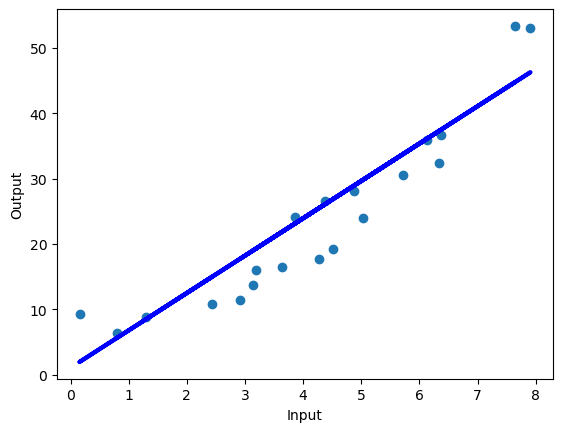

In [21]:
plt.scatter(X_test.reshape(X_test.shape[0]), y_test.reshape(X_test.shape[0]))
plt.plot(X_test.reshape(X_test.shape[0]), y_pred, color="blue", linewidth=3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Using Sklearn


In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [94]:
pred = lr.predict(y_test)

In [95]:
from sklearn.metrics import r2_score

r2_score(y_pred=pred, y_true=y_test)

-92.00413491514412